In [1]:
###########QUANTL DATA (option 2)
import quandl as quandl
quandl.ApiConfig.api_key = '8dw-JDusjBv2LvyGFBSo'
data = quandl.get("WIKI/AAPL", start_date="2010-1-1", end_date="2018-9-23")
######################


from pandas_datareader import data as pdr
import datetime

import pandas as pd
import pandas_datareader.data as web

start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 3, 9)

sp500 = web.DataReader('^GSPC', 'yahoo', start, end)
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,1462.430054,1426.189941,1426.189941,1462.420044,4202600000,1462.420044
2013-01-03,1465.469971,1455.530029,1462.420044,1459.369995,3829730000,1459.369995
2013-01-04,1467.939941,1458.989990,1459.369995,1466.469971,3424290000,1466.469971
2013-01-07,1466.469971,1456.619995,1466.469971,1461.890015,3304970000,1461.890015
2013-01-08,1461.890015,1451.640015,1461.890015,1457.150024,3601600000,1457.150024


In [3]:
###########QUANTL DATA (option 2)

start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2018, 3, 31)

import quandl as quandl
quandl.ApiConfig.api_key = '8dw-JDusjBv2LvyGFBSo'
data = quandl.get("WIKI/AAPL", start_date=start_date, end_date=end_date)
######################
data.to_excel('data.xlsx')

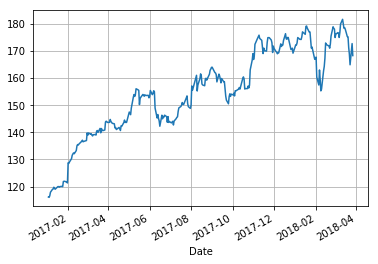

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close'].plot(grid=True)
plt.show()

In [4]:
import numpy as np
daily_close = data[['Adj. Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close.pct_change()+1)
daily_pct_change.head()

,Adj. Close
Date,
2017-01-03,0.000000
2017-01-04,-0.001119
2017-01-05,0.005085
2017-01-06,0.011148
2017-01-09,0.009160


       Adj. Close
count  307.000000
mean     0.001327
std      0.012488
min     -0.044165
25%     -0.004386
50%      0.000391
75%      0.007016
max      0.060981


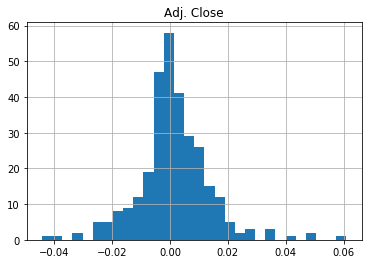

In [5]:
monthly = data.resample('BM').apply(lambda x: x[-1]) #take the last price of the month
monthly.pct_change()
quarter = data.resample('4M').mean()


# OR
daily_pct_change = daily_close / daily_close.shift(1) - 1
daily_log_returns = np.log(daily_pct_change + 1)


#vizualize
daily_pct_change.hist(bins=30)


print(daily_pct_change.describe())

In [6]:
# Calculate the cumulative daily returns
cum_daily_return = (daily_pct_change + 1).cumprod()
cum_daily_return

cum_monthly_return = cum_daily_return.resample('M').mean()

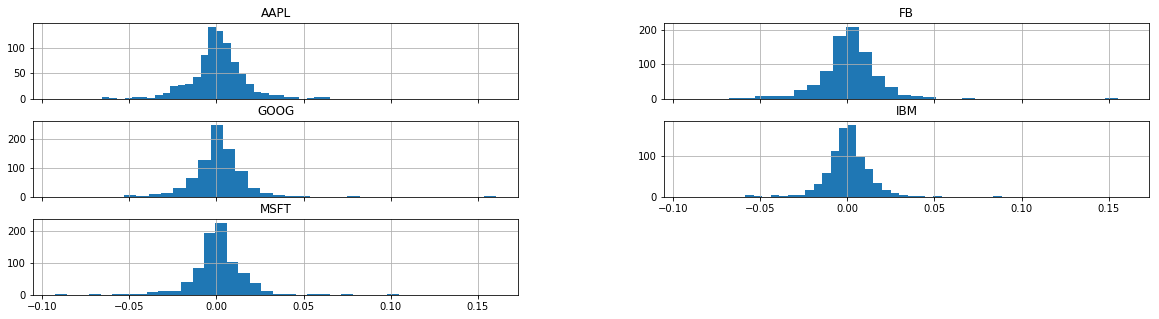

In [7]:
import quandl as quandl

start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2018, 8, 31)
database = 'WIKI/'
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG', 'FB']

quandl.ApiConfig.api_key = '8dw-JDusjBv2LvyGFBSo'



def get(tickers, startdate, enddate):
    def data(ticker):
        return ((quandl.get(database + ticker, start_date=startdate, end_date=enddate)))
    datas = map(data,tickers) # apply the function to objects
    return(pd.concat(datas, keys = tickers, names = ['Ticker', 'Date']))

all_data = get(tickers, start_date, end_date)
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date', 'Ticker','Adj. Close')
daily_close_px = daily_close_px.pct_change()
daily_close_px.fillna(0, inplace=True)
daily_close_px.hist(bins = 30, figsize=(20,5), sharex=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a69b630>,
      dtype=object)

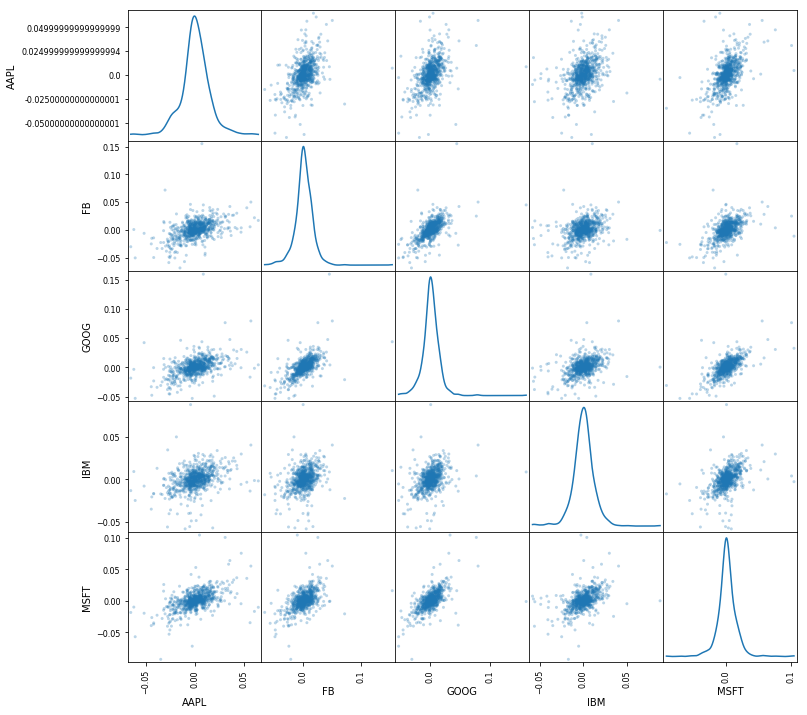

In [8]:
pd.plotting.scatter_matrix(daily_close_px,diagonal='kde', alpha=0.3,figsize=(12,12))

# Moving windows

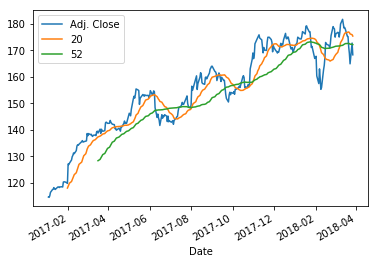

In [9]:
data['20'] = data['Adj. Close'].rolling(20).mean()
data['52'] = data['Adj. Close'].rolling(52).mean()
data[['Adj. Close','20','52']].plot()
plt.show()

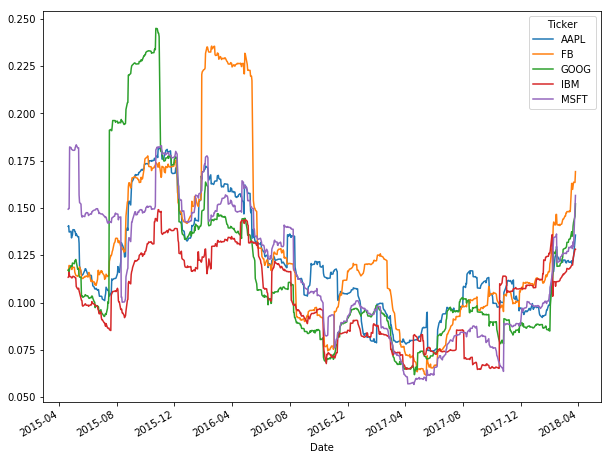

In [10]:
min_periods = 75
vol = daily_close_px.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [11]:
# More stats
import statsmodels.api as sm

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj. Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
Y = return_data['AAPL']
X = return_data['MSFT']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 Sep 2018   Prob (F-statistic):                nan
Time:                        20:00:58   Log-Likelihood:                    nan
No. Observations:                 812   AIC:                               nan
Df Residuals:                     810   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/Users/SlavOK/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/SlavOK/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/SlavOK/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


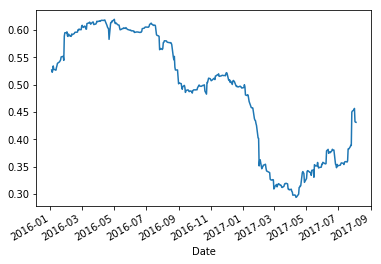

In [12]:
    return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

# Trading strategu SMA

In [13]:
aapl = all_data.reset_index()
aapl = aapl[aapl['Ticker']=='AAPL']
aapl = aapl.set_index('Date')

short_window = 40
long_window = 100


signals = pd.DataFrame(index = aapl.index)
signals['signal'] = 0.0


signals['short_mavg'] = aapl['Adj. Close'].rolling(short_window).mean()
signals['long_mavg'] = aapl['Adj. Close'].rolling(long_window).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'] - signals['signal'].shift(1)



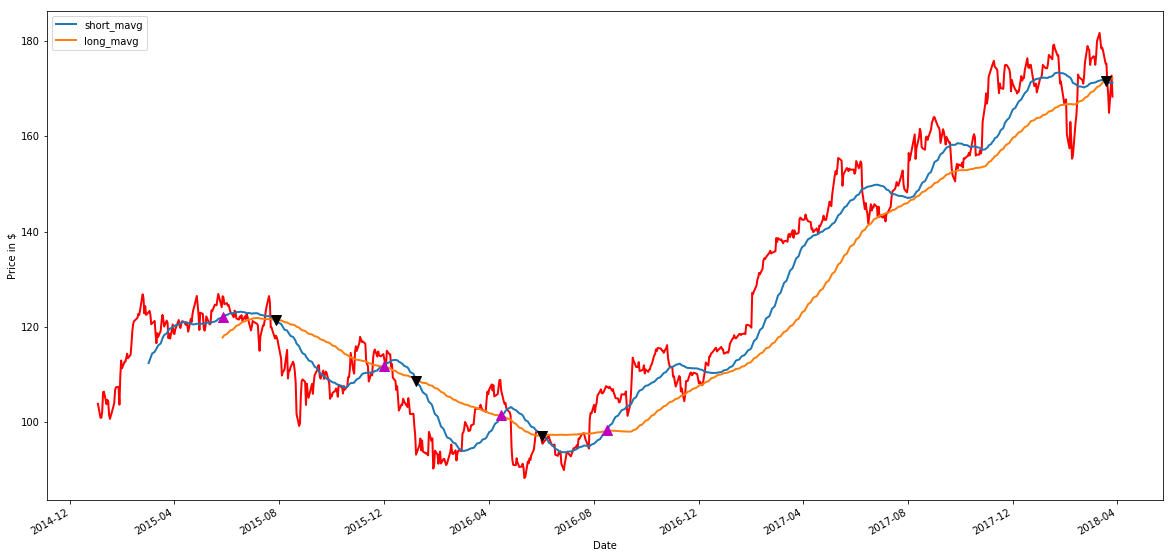

In [14]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')
    
# Plot the closing price
aapl['Adj. Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [46]:
initial_capital = float(100000)

signals.fillna(0,inplace=True)
positions = pd.DataFrame(index = signals.index).fillna(0)

#Buy 100 shares
positions['AAPL'] = signals['positions'] * 100

# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum() 

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
portfolio.to_excel('Portfolio.xlsx',)